In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#download the dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Pakistan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

`twitter_samples` dataset consists of labeled positive and negative tweets with equal proportion. A balanced dataset

In [3]:
# loading positive and negative tweets
positive_twts=twitter_samples.strings('positive_tweets.json')
negative_twts = twitter_samples.strings('negative_tweets.json')

print('No. of positive tweets',len(positive_twts))
print('No. of negative tweets', len(negative_twts))

No. of positive tweets 5000
No. of negative tweets 5000


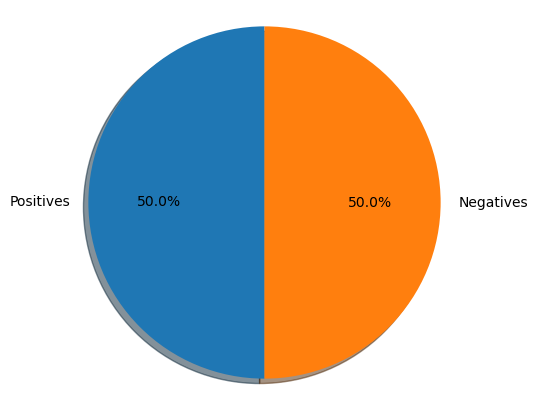

In [4]:
# visualize distribution of data using pie chart
fig = plt.figure(figsize=(5,5))

labels= 'Positives', 'Negatives'
sizes = [len(positive_twts), len(negative_twts)]
# plt.pie(sizes, labels, autopct = '%1.1f%%')
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

# Processing the raw text

In [6]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer # 

## Remove hyperlinks, Twitter marks and styles and stemming

In [90]:
from utilities.processing import process_tweet
process_tweet(positive_twts[2277])

['beauti',
 'sunflow',
 'sunni',
 'friday',
 'morn',
 ':)',
 'sunflow',
 'favourit',
 'happi',
 'friday',
 '…']

# Building and Visualizing word frequencies:
Utilieze a function `count_frequency()` to count how often a word in the is associated with positive label `1` or a negative label `0`.

In [92]:
# Concatenate the tweets into a list. first part is all positive tweets and second part is all negative tweets
tweets = positive_twts + negative_twts
print('The number of tweets: ', len(tweets)
)


The number of tweets:  10000


In [130]:
# Build and equaliant array of labels of size (10000,) in which fist 5000 enteris are all 1's and second 5000 are al 0's
labels = np.append(np.ones((len(positive_twts,)),dtype='int'), np.zeros((len(negative_twts,)),dtype='int'))
print(labels.shape)
print(np.unique(labels))

(10000,)
[0 1]


In [131]:
from utilities.processing import count_frequency as counter

frequencies=counter(tweets, labels)

print('Total (word,label) pairs',len(frequencies))
print(frequencies)

Total (word,label) pairs 13170
{('followfriday', 1): 25, ('top', 1): 32, ('engag', 1): 7, ('member', 1): 16, ('commun', 1): 33, ('week', 1): 83, (':)', 1): 3691, ('hey', 1): 77, ('jame', 1): 7, ('odd', 1): 2, (':/', 1): 5, ('pleas', 1): 99, ('call', 1): 37, ('contact', 1): 7, ('centr', 1): 2, ('02392441234', 1): 1, ('abl', 1): 8, ('assist', 1): 1, ('mani', 1): 33, ('thank', 1): 643, ('listen', 1): 17, ('last', 1): 47, ('night', 1): 68, ('bleed', 1): 2, ('amaz', 1): 51, ('track', 1): 5, ('scotland', 1): 2, ('congrat', 1): 21, ('yeaaah', 1): 1, ('yipppi', 1): 1, ('accnt', 1): 2, ('verifi', 1): 2, ('rqst', 1): 1, ('succeed', 1): 1, ('got', 1): 69, ('blue', 1): 9, ('tick', 1): 1, ('mark', 1): 1, ('fb', 1): 6, ('profil', 1): 2, ('15', 1): 5, ('day', 1): 246, ('one', 1): 131, ('irresist', 1): 2, ('flipkartfashionfriday', 1): 17, ('like', 1): 233, ('keep', 1): 68, ('love', 1): 401, ('custom', 1): 4, ('wait', 1): 70, ('long', 1): 36, ('hope', 1): 143, ('enjoy', 1): 79, ('happi', 1): 212, ('fri

## Tabel of word counts

In [143]:
from utilities.processing import process_tweet
words = [word for tweet in tweets for word in process_tweet(tweet)]
vocabulary = list(set(words))

In [156]:
# randomly selecting 30 words from vocabulary set for visualization
import random
np.random.seed(2345)
vocab_sset=random.sample(vocabulary,20)

# make data table of positive and negative frequencies for each word in vocab_sset
data=[]
for word in vocab_sset:
    pos=0
    neg=0
    #retrieve number of positive counts
    if (word,1) in frequencies:   
        pos=frequencies[(word,1)]
    # retrieve number of negative counts
    if (word,0) in frequencies:
        neg = frequencies[(word,0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['anonym', 1, 0],
 ['blogiversari', 1, 0],
 ['malik', 1, 1],
 ['goodnight', 24, 1],
 ['chronicl', 4, 0],
 ['geskenya', 1, 0],
 ['cheer', 21, 6],
 ['faceit', 1, 0],
 ['remind', 6, 3],
 ['askip', 0, 1],
 ['🍜', 0, 3],
 ['gooday', 3, 0],
 ['chuckin', 0, 1],
 ['nnnooo', 0, 1],
 ['studi', 6, 2],
 ['pehli', 1, 0],
 ['de', 1, 1],
 ['wont', 5, 9],
 ['msnbc', 0, 1],
 ['titan', 0, 1]]

\\?\C:\Users\Pakistan\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127836 (\N{STEAMING BOWL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


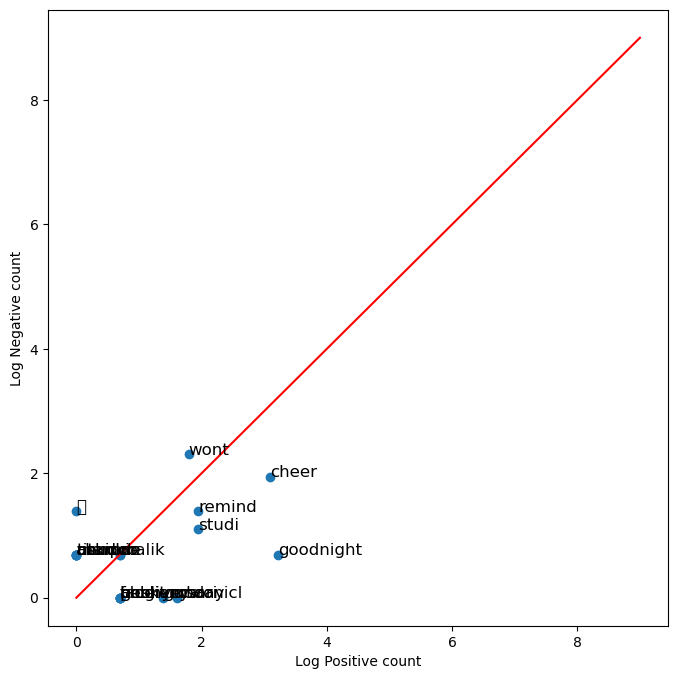

In [157]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()